In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [57]:
# 8 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_55/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

# TMM to SMM

In [58]:
df['gap-1'] = df['mcwat-1'] - df['mcwas-1']
df['gap0'] = df.mcwat0 - df.mcwas0
df['gap+1'] = df['mcwat+1'] - df['mcwas+1']
df['t_gap'] = df.t_mcwat - df.t_mcwas
df['tpr_gap'] = df.tpr_mcwat - df.tpr_mcwas

# Benchmark

## abs(difference in transmittance)

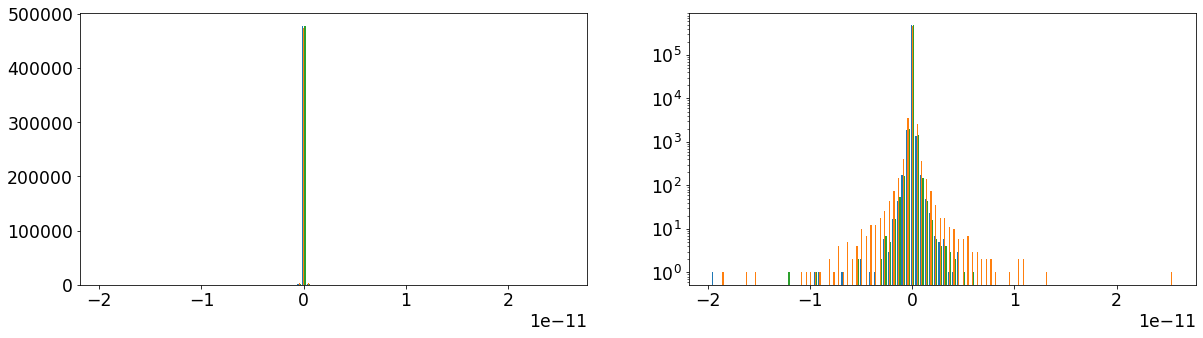

In [59]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

## Normalized abs(difference in transmittance) 

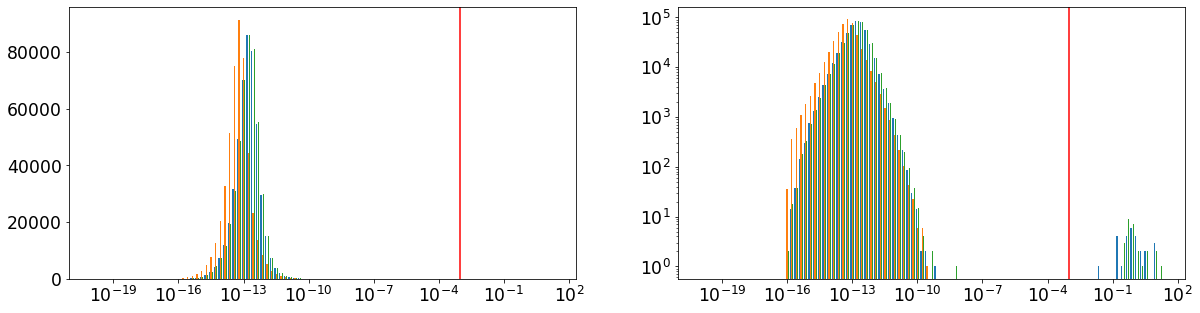

In [60]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(0.001, c='r')
axes[1].axvline(0.001, c='r')

axes[0].hist([abs(df['gap-1']/df['mcwat-1']), abs(df['gap0']/df['mcwat0']), abs(df['gap+1']/df['mcwat+1'])], bins=np.logspace(np.log10(1E-20), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df['mcwat-1']), abs(df['gap0']/df['mcwat0']), abs(df['gap+1']/df['mcwat+1'])], bins=np.logspace(np.log10(1E-20), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 0.1 %

orange is 0th order

In [61]:
df[abs(df['gap-1']/df['mcwat-1'])>0.001][['mcwat-1', 'mcwas-1', 'gap-1']]

,mcwat-1,mcwas-1,gap-1
1868,4.961964e-31,1.077038e-30,-5.808420e-31
6212,6.141080e-30,9.862220e-32,6.042457e-30
7958,2.302872e-31,2.758670e-30,-2.528382e-30
8453,1.745009e-30,4.306614e-31,1.314348e-30
15278,7.705386e-31,4.758377e-31,2.947010e-31
31535,1.301857e-30,5.706280e-31,7.312289e-31
48232,2.593114e-30,2.206789e-31,2.372435e-30
54531,2.302872e-31,2.758670e-30,-2.528382e-30
58869,1.958375e-31,9.283327e-31,-7.324952e-31
60851,1.491581e-30,1.730252e-30,-2.386711e-31


In [62]:
df[abs(df['gap0']/df['mcwat0'])>0.001][['mcwat0', 'mcwas0', 'gap0']]

,mcwat0,mcwas0,gap0


In [63]:
df[abs(df['gap+1']/df['mcwat+1'])>0.001][['mcwat+1', 'mcwas+1', 'gap+1']]

,mcwat+1,mcwas+1,gap+1
1868,1.700904e-31,4.174720e-31,-2.473816e-31
6212,6.682170e-30,2.357533e-32,6.658594e-30
7958,5.313359e-31,2.776086e-30,-2.244750e-30
8453,1.584302e-30,2.986411e-31,1.285661e-30
15278,6.526745e-31,8.500116e-32,5.676734e-31
31535,9.806826e-31,4.223764e-31,5.583062e-31
48232,5.582731e-31,3.335962e-32,5.249135e-31
54531,5.313359e-31,2.776086e-30,-2.244750e-30
58869,1.051158e-30,5.297572e-31,5.214007e-31
60851,1.740438e-30,1.157433e-30,5.830052e-31


Big errors are coming from sub modes which have very small values so normalization harm result.

# benchmark - simulation time

## run time by time.time()

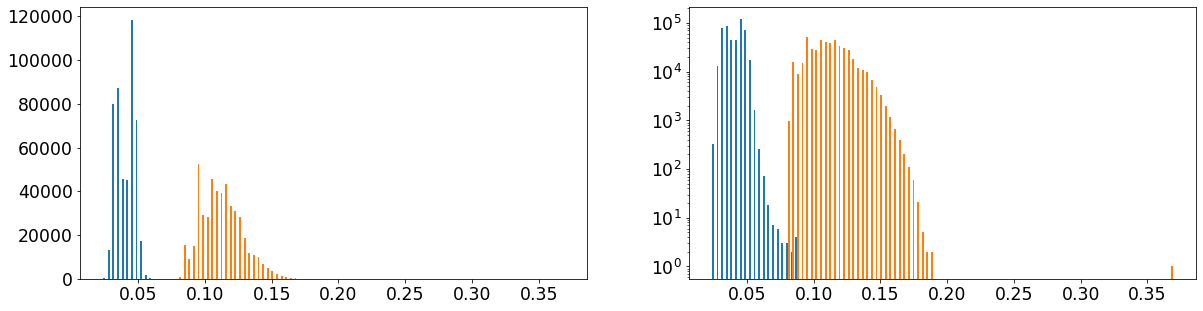

In [64]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['t_mcwat'],df['t_mcwas']], bins=100)
# axes[0].hist(df['t_mcwas'], bins=100)
axes[1].hist([df['t_mcwat'],df['t_mcwas']], bins=100, log=True)
# axes[1].hist(df['t_mcwas'], bins=100, log=True)
# plt.xscale('log')
plt.show()

Blue is  meent with TMM, Oragne is meent with SMM

## SMM time / TMM time

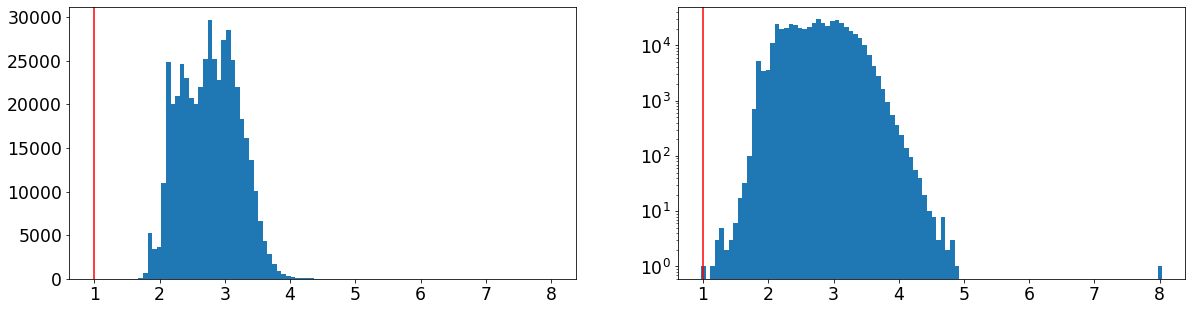

In [65]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df['t_mcwas'])/df['t_mcwat'], bins=100)
axes[1].hist((df['t_mcwas'])/df['t_mcwat'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [66]:
(df['t_mcwas']/df['t_mcwat']).describe()

count    481647.000000
mean          2.764271
std           0.439780
min           0.968381
25%           2.400051
50%           2.772774
75%           3.095961
max           8.037431
dtype: float64

TMM is faster 2.8 times than SMM.

right side of red line: TMM is faster


## time.process_time()

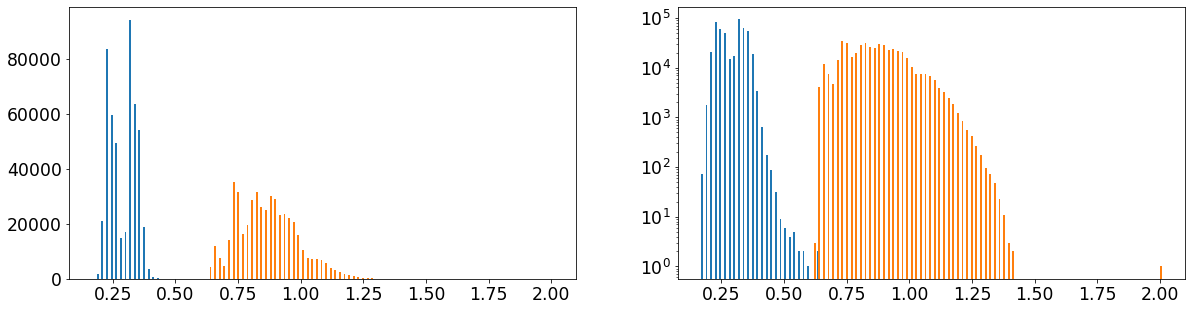

In [67]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['tpr_mcwat'],df['tpr_mcwas']], bins=100)
# axes[0].hist(df['t_mcwas'], bins=100)
axes[1].hist([df['tpr_mcwat'],df['tpr_mcwas']], bins=100, log=True)
# axes[1].hist(df['t_mcwas'], bins=100, log=True)
# plt.xscale('log')
plt.show()

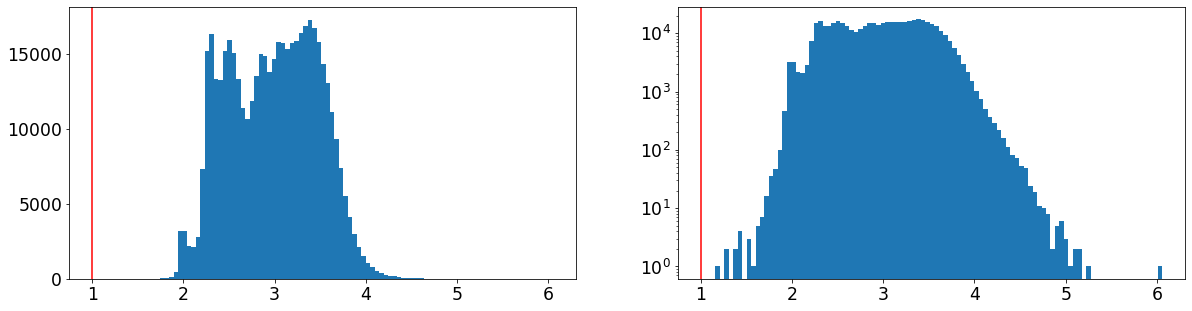

In [68]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df['tpr_mcwas'])/df['tpr_mcwat'], bins=100)
axes[1].hist((df['tpr_mcwas'])/df['tpr_mcwat'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [69]:
(df['tpr_mcwas']/df['tpr_mcwat']).describe()

count    481647.000000
mean          2.982901
std           0.486763
min           1.157268
25%           2.560775
50%           3.006731
75%           3.375830
max           6.058321
dtype: float64